In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import random
% matplotlib inline

In [2]:
data_path = "../../data/original/train.h5"
df = pd.read_hdf(data_path, key='table')
end = int(60e6)
sig = pd.to_numeric(df['s'][:end])
sig = signal.savgol_filter(sig, 129, 5, mode='nearest')
ttf = df['ttf'][:end]
print("sig len ", len(sig))

sig len  60000000


## Signal sample

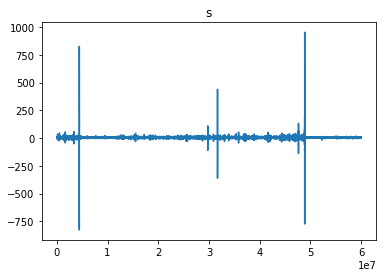

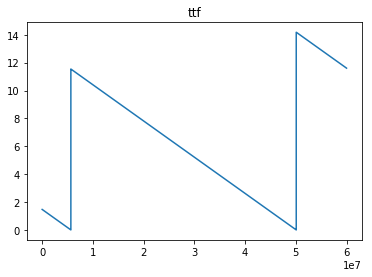

In [3]:
num_to_show = int(60e6)
plt.figure()
plt.plot(sig[:num_to_show])
plt.title('s')
plt.show()

plt.figure()
plt.plot(ttf[:num_to_show])
plt.title('ttf')
plt.show()

## Spectrogramm

In [47]:
%%time
fs = 400000.0
# window = [10000]
nperseg = 50000
noverlap = 45000
mode = 'magnitude'
scaling = 'spectrum'
f, t, Sxx = signal.spectrogram(sig, fs, 
                               nperseg=nperseg,
                               noverlap=noverlap,
                               mode=mode,
                              scaling=scaling)
print("time seg", len(t))
print("freq seg", len(f))
print("Spectr shape", Sxx.shape)
print("spectr min max mean std", Sxx.min(), Sxx.max(), Sxx.mean(), Sxx.std())

time seg 11991
freq seg 25001
Spectr shape (25001, 11991)
spectr min max mean std 1.4392424365420992e-09 5.344218796393308 0.0011522699272157988 0.013252417911327115
Wall time: 14.6 s


12000
(25001, 11991)


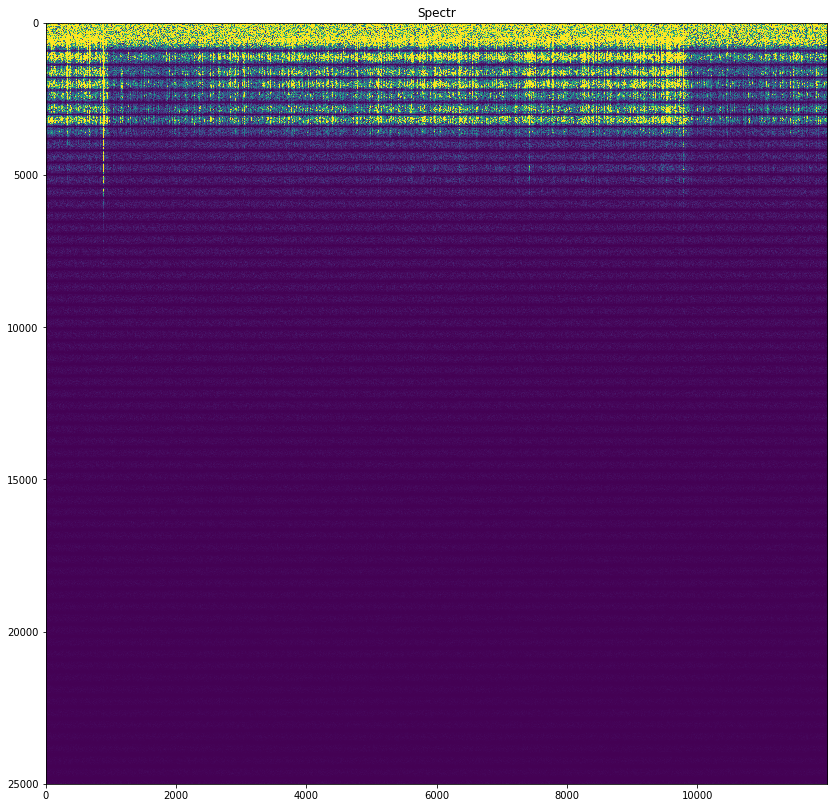

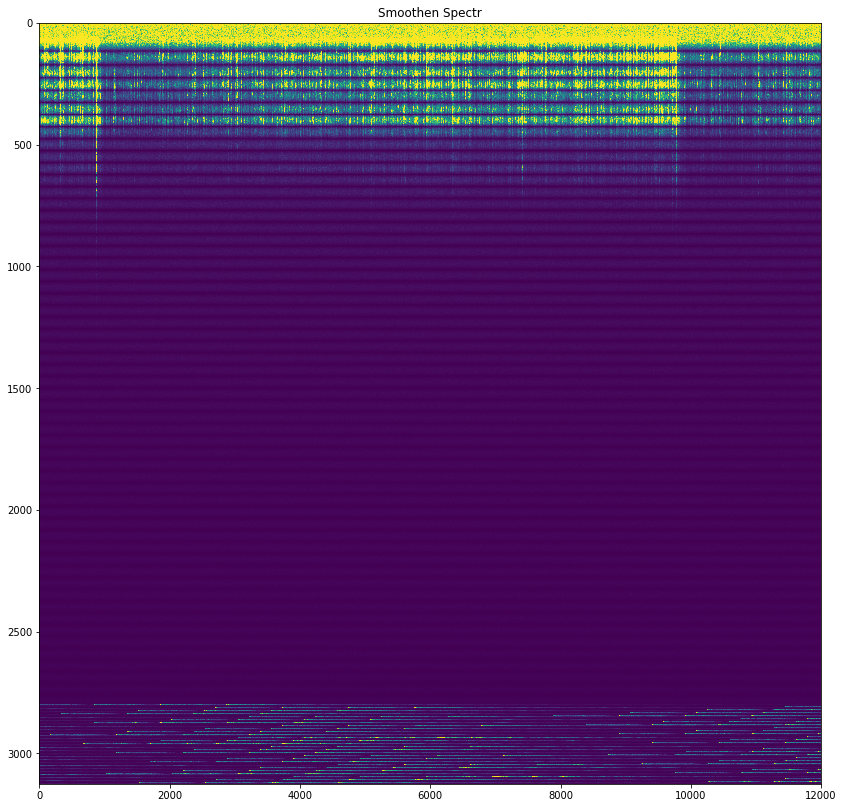

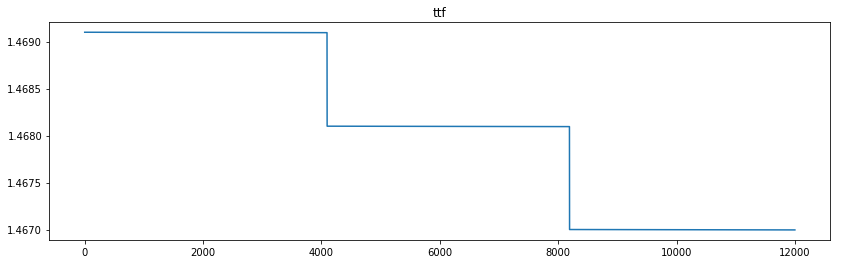

Wall time: 38.7 s


In [48]:
%%time
end = num_to_show // (nperseg - noverlap)
print(end)
print(Sxx.shape)
plt.figure(figsize=(14,14))

plt.imshow(Sxx[:, :end], vmax=0.01, origin='upper', aspect='auto')
plt.title("Spectr")
plt.show()

plt.figure(figsize=(14,14))
smoothen = signal.convolve2d(Sxx, np.array([[0.25]*2, [0.25]*2 ]).T, mode='full')[::2]
smoothen = signal.convolve2d(smoothen, np.array([[0.25]*2, [0.25]*2]).T, mode='full')[::2]
smoothen = signal.convolve2d(smoothen, np.array([[0.25]*2, [0.25]*2]).T, mode='full')[::2]

# smoothen = signal.convolve2d(smoothen, np.array([[0.25,0.25, 0.25, 0.25]]).T, mode='full')[::4]
plt.imshow(smoothen[:, :end], vmax=0.01, origin='upper', aspect='auto')
plt.title("Smoothen Spectr")
plt.show()

plt.figure(figsize=(14,4))
plt.plot(ttf[:end])
plt.title('ttf')
plt.show()

## Single sample example 

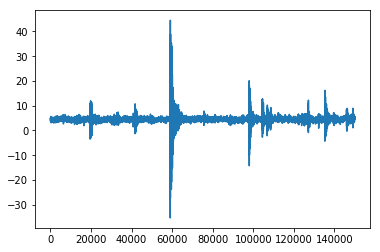

In [40]:
sample_len = 150000
rnd_idx = random.randint(0, len(sig) - sample_len)
sample_sig = sig[rnd_idx: rnd_idx + sample_len]
sample_ttf = ttf[rnd_idx: rnd_idx + sample_len]

plt.plot(sample_sig)
plt.show()

In [41]:
%%time
fs = 4000000.0
# window = [10000]
nperseg = 50000
noverlap = 45000
mode = 'magnitude'
scaling='spectrum'
f_s, t_s, Sxx_s = signal.spectrogram(sample_sig, fs, 
                               nperseg=nperseg,
                               noverlap=noverlap,
                               mode=mode,
                                scaling=scaling)
print("time seg", len(t_s))
print("freq seg", len(f_s))
print("Spectr shape", Sxx_s.shape)
print("spectr min max mean std", Sxx_s.min(), Sxx_s.max(), Sxx_s.mean(), Sxx_s.std())

time seg 21
freq seg 25001
Spectr shape (25001, 21)
spectr min max mean std 9.771167378776975e-09 0.3310521606755943 0.002139616857852288 0.009111350642541996
Wall time: 48 ms


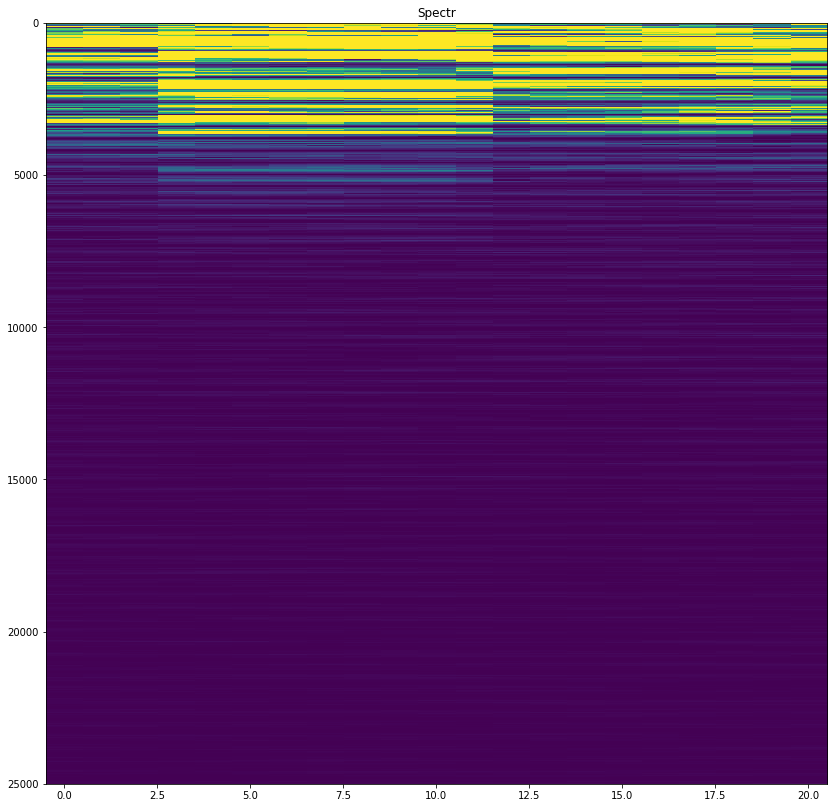

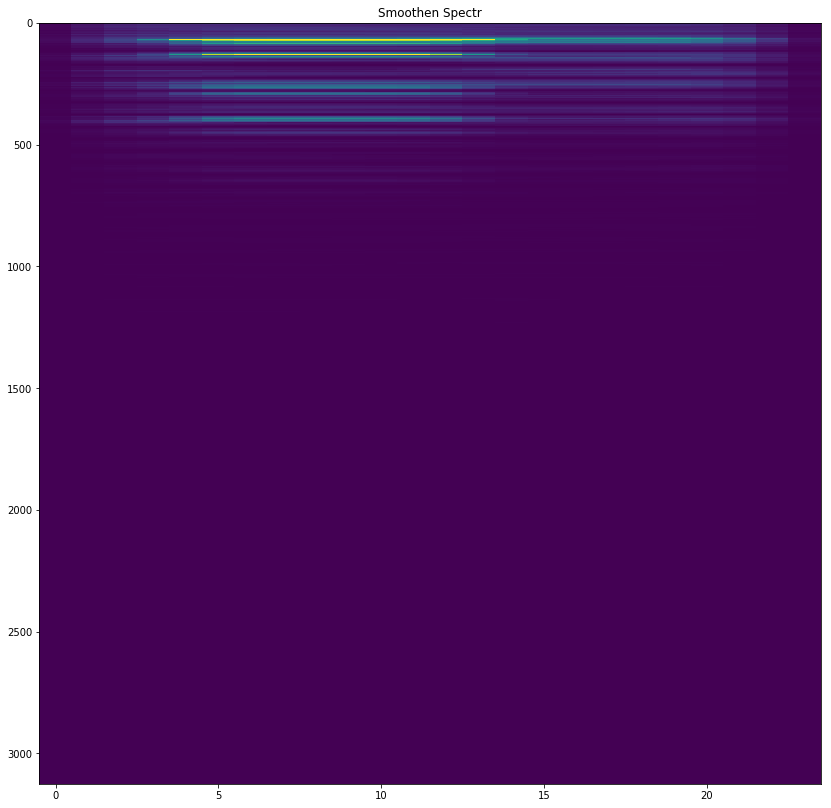

(3126, 24)


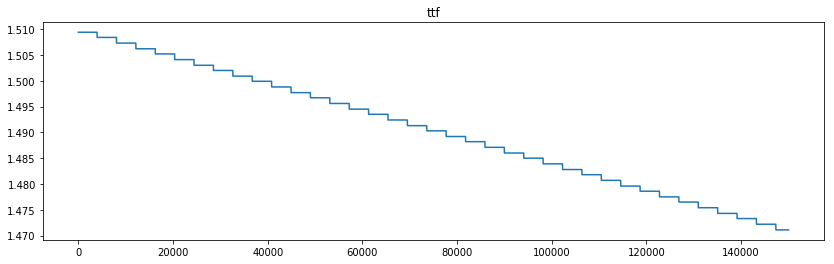

Wall time: 714 ms


In [46]:
%%time
plt.figure(figsize=(14,14))
plt.imshow(Sxx_s, vmax=0.01, origin='upper', aspect='auto')
plt.title("Spectr")
plt.show()

plt.figure(figsize=(14,14))
smoothen_s = signal.convolve2d(Sxx_s, np.array([[0.25]*2, [0.25]*2]).T, mode='full')[::2]
smoothen_s = signal.convolve2d(smoothen_s, np.array([[0.25]*2, [0.25]*2]).T, mode='full')[::2]
smoothen_s = signal.convolve2d(smoothen_s, np.array([[0.25]*2, [0.25]*2]).T, mode='full')[::2]
plt.imshow(smoothen_s[:, :end], vmax=0.1, origin='upper', aspect='auto')
plt.title("Smoothen Spectr")
plt.show()
print(smoothen_s.shape)

plt.figure(figsize=(14,4))
plt.plot(sample_ttf.values)
plt.title('ttf')
plt.show()

## Generate new DataFrame